# Exercise 1
## Advanced Machine Learning, SoSe 2021
### Authors: Aaron Osburg, Elias Olofsson
    Version information:
        2021-04-28: v.1.0. First public release. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

# Produce inline vector graphics
%config InlineBackend.figure_format = 'svg'

## 1. Loading the Dataset (2 pts)

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())

data         = digits['data']
target       = digits['target']
target_names = digits['target_names']
images       = digits['images']

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
print(data.dtype, data.shape)
print(target.dtype, target.shape)
print(target_names.dtype, target_names.shape, target_names)
print(images.dtype, images.shape)

float64 (1797, 64)
int64 (1797,)
int64 (10,) [0 1 2 3 4 5 6 7 8 9]
float64 (1797, 8, 8)


In [4]:
def create_binary_TS(label1, label2, data, target, target_names):
    """
    Create a binary training set from a larger training set. Relabels
    responses of class label1 to 1, and class label2 to -1.

    Parameters:
    -----------
    label1: string or int
        First class label.
    label2: string or int
        Second class label.
    data: np.array shape=(N', D)
        Feature matrix.
    target: np.array shape=(N',)
        Response vector. Containing integers corresponding to indices
        of the class labels in target_names.
    target_names: np.array of string/int values 
        Class labels.
    
    Returns:
    --------
    X: np.array shape=(N, D)
        Reduced feature matrix.
    y: np.array shape=(N,)
        Reduced response vector.
    """
    # Get target indices.
    target_idx1, = np.where(target_names == label1)
    target_idx2, = np.where(target_names == label2)

    # Filter out the corresponding instances.
    mask = (target == target_idx1) | (target == target_idx2)
    X = data[mask]
    y = target[mask]

    # Relabel targets.
    y[y == target_idx2] = -1
    y[y == target_idx1] = 1

    # Append column of ones to absorb the intercept.
    X = np.hstack((X, np.ones(X.shape[0])[:, None]))

    return X, y

In [5]:
X, y = create_binary_TS(3, 8, data, target, target_names)
print(X.shape, y.shape)

(357, 65) (357,)


1


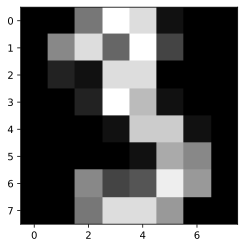

-1


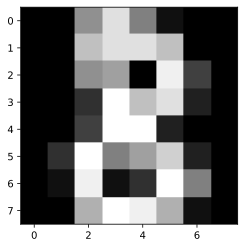

In [6]:
# Testing the first two instances.
idx = 0
print(y[idx])
plt.imshow(X[idx][:-1].reshape(8,8))
plt.show()

idx = 1
print(y[idx])
plt.imshow(X[idx][:-1].reshape(8,8))
plt.show()




## 1.1 Classification with sklearn (6 pts)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

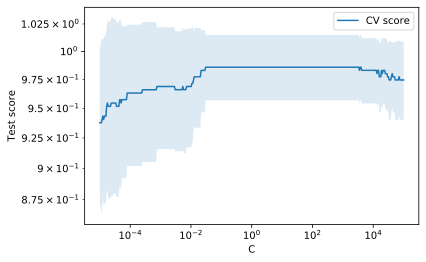

In [8]:
kfolds = 10 # Number of folds used in K-fold cross validation.
C = np.logspace(-5, 5, num=400) # Inverse regularization parameter.

# Perform cross-validation over the range of parameters
means = np.zeros(C.size) 
stds  = np.zeros(C.size)
for i, c_val in enumerate(C):
    logreg = LogisticRegression(C=c_val, max_iter=500)
    scores = model_selection.cross_val_score(logreg, X, y, cv=kfolds)
    means[i], stds[i] = scores.mean(), scores.std()

# Plot results of cross-validations
plt.loglog(C, means, label="CV score")
plt.fill_between(C, (means-stds), (means+stds), alpha=0.15)
plt.xlabel('C')
plt.ylabel('Test score')
plt.legend()
plt.show()

## 1.2 Optimization Methods (20 pts)

In [9]:
C = 1 # Inverse regularization parameter.

def sigmoid(z):
    """
    Numerically stable logistic sigmoid function.
    """
    out = np.zeros_like(z)
    mask = z >= 0
    out[mask]  = 1 / (1 + np.exp(-z[mask]))                # z positive 
    out[~mask] = np.exp(z[~mask]) / (1 + np.exp(z[~mask])) # z negative
    return out

def gradient(beta, X, y):
    """
    Returns the gradient of the loss function for the given arguments.
    """
    return beta/C + ((sigmoid(-y*X.dot(beta))*(-y)).dot(X)) / X.shape[0]

def predict(beta, X):
    """
    Return predicted class label for each instance (i.e. row) in X. 
    """
    y_prediction = np.zeros(X.shape[0])
    mask = X.dot(beta) > 0 
    y_prediction[mask]  = 1
    y_prediction[~mask] = -1
    return y_prediction

def zero_one_loss(y_prediction, y_truth):
    """
    Count the wrongly classified labels.
    """
    return (y_prediction != y_truth).sum()


In [26]:
m = 150 # Number of iterations to perform.

def GD(X, y, beta_0, tau_0, gamma):
    """
    Plain gradient descent.
    """
    beta = beta_0                       # Set initial guess.   
    for t in range(m):                  # For each iteration, do:
        tau = tau_0 / (1 + gamma*t)         # Get the current learning rate.
        beta -= tau * gradient(beta, X, y)  # Compute the gradient for the entire TS.
    return beta

def SGD(X, y, beta_0, tau_0, gamma, B=1, mu=0):
    """
    Stochastic gradient descent with (optionally) minibatch and/or momentum.
    
    Parameters:
    ----------- 
    X: feature matrix
    y: reponse vector
    beta_0: initial guess of solution
    tau_0: initial learning rate
    gamma: learning rate decay
    B: random batch size for gradient computation
    mu: momentum fraction (mu=0 deactivated)

    Returns:
    --------
    beta: final solution after m iterations 
    """
    beta = beta_0                       # Set initial guess.
    g = np.zeros_like(beta)             # Initialize gradient memory.
    for t in range(m):                  # For each iteration, do:
        tau = tau_0 / (1 + gamma*t)                  # Get the current learning rate.
        i = np.random.randint(y.size, size=B)        # Sample a subset of instances uniformly at random.  
        g = mu*g + (1-mu)*gradient(beta, X[i], y[i]) # Get gradient on the subset, weighted with old value.
        beta -= tau * g                              # Update solution.
    return beta

def ADAM():
    """
    ADAM optimizer.    
    """

    return


In [64]:
i = np.random.randint(y.size, size=1)
print(i)

[149]


In [50]:
n_splits = 10

kf = model_selection.KFold(n_splits=n_splits)
error = []
for train_index, test_index in kf.split(X):
    # Get current train/test split.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train classifier on training set.
    beta_0 = np.zeros(X.shape[1])
    tau_0 = 0.01
    gamma = 0.001
    beta = grad_desc(X_train, y_train, beta_0, tau_0, gamma)

    # Get predictions on test set.
    y_prediction = predict(beta, X_test)

    # Evaluate performance
    err_count = zero_one_loss(y_prediction, y_test)
    error.append(err_count/y_test.size)

error = np.array(error)
accuracy = 1 - error
print(f"Accuracy: {accuracy.mean():.3f} ± {accuracy.std():.3f}")

Accuracy: 0.969 ± 0.053


In [12]:


def SAG():
    """
    Stochastic average gradient descent.
    """
    return

def dual_coord_asc():
    """
    Dual coordinate ascent.
    """
    return

def newton_raphson():
    """
    Newton/Raphson's algorithm.
    """
    return

